Assignment:

In this assignment, you'll continue working with the U.S. Education Dataset from Kaggle. The data gives detailed state level information on the several facets of the state of education on an annual basis. To learn more about the data and the column descriptions, you can view the Kaggle link above. You should access the data from the Thinkful database. Here's the credentials you can use to connect to the database:

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

Don't forget to apply the most suitable missing value filling techniques you applied in the previous checkpoint to the data. You're supposed to provide your answers to the following questions after you handled the missing values.

To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import scipy.stats as stats
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21' 
postgres_host = '142.93.121.174' 
postgres_port = '5432'
postgres_db = 'useducation'
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
df = pd.read_sql_query('select * from useducation', con=engine)
engine.dispose()

In [3]:
df1=df.copy()

In [4]:
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1229 non-null float64
TOTAL_REVENUE                   1280 non-null float64
FEDERAL_REVENUE                 1280 non-null float64
STATE_REVENUE                   1280 non-null float64
LOCAL_REVENUE                   1280 non-null float64
TOTAL_EXPENDITURE               1280 non-null float64
INSTRUCTION_EXPENDITURE         1280 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1280 non-null float64
OTHER_EXPENDITURE               1229 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1280 non-null float64
GRADES_PK_G                     1319 non-null float64
GRADES_KG_G                     1360 non-null float64
GRADES_4_G                      1361 non-null float64
GRADES_8_G                      1

In [6]:
df.isnull().sum()

PRIMARY_KEY                       0
STATE                             0
YEAR                              0
ENROLL                          263
TOTAL_REVENUE                   212
FEDERAL_REVENUE                 212
STATE_REVENUE                   212
LOCAL_REVENUE                   212
TOTAL_EXPENDITURE               212
INSTRUCTION_EXPENDITURE         212
SUPPORT_SERVICES_EXPENDITURE    212
OTHER_EXPENDITURE               263
CAPITAL_OUTLAY_EXPENDITURE      212
GRADES_PK_G                     173
GRADES_KG_G                     132
GRADES_4_G                      131
GRADES_8_G                      131
GRADES_12_G                     131
GRADES_1_8_G                    131
GRADES_9_12_G                   131
GRADES_ALL_G                    173
AVG_MATH_4_SCORE                956
AVG_MATH_8_SCORE                960
AVG_READING_4_SCORE             959
AVG_READING_8_SCORE             994
dtype: int64

In [7]:
filling_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE",
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE",
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G",
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G",
             "GRADES_9_12_G", "GRADES_ALL_G"]
states = df['STATE'].unique()
for state in states:
    df.loc[df['STATE']==state,filling_list]= df.loc[df['STATE']==state,filling_list].fillna( df.loc[df['STATE']==state,filling_list].interpolate())
    df.dropna(inplace=True)

1.Derive the descriptive statistics of the data and discuss the points you find remarkable.

In [8]:
df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,414.000000,4.140000e+02,4.140000e+02,4.140000e+02,4.140000e+02,4.140000e+02,4.140000e+02,4.140000e+02,4.140000e+02,4.140000e+02,...,414.000000,414.000000,414.000000,4.140000e+02,4.140000e+02,4.140000e+02,414.000000,414.000000,414.000000,414.000000
mean,2007.528986,9.311473e+05,1.033807e+07,9.298609e+05,4.771871e+06,4.636337e+06,1.044565e+07,5.403173e+06,3.050339e+06,4.734953e+05,...,71333.905797,72004.845411,63216.560386,5.753207e+05,2.819817e+05,8.794770e+05,236.626729,279.522674,219.320467,263.555352
std,5.265161,1.091518e+06,1.266362e+07,1.286526e+06,5.874469e+06,5.977707e+06,1.291529e+07,6.799877e+06,3.584888e+06,5.639103e+05,...,83832.542878,83705.702517,73868.461036,6.749255e+05,3.301498e+05,1.031106e+06,9.001930,9.623344,7.587072,6.944643
min,1996.000000,4.417900e+04,6.788740e+05,5.787000e+04,0.000000e+00,2.853100e+04,7.032450e+05,3.182600e+05,2.041170e+05,2.310700e+04,...,3423.000000,2860.000000,2188.000000,2.676200e+04,9.970000e+03,3.682300e+04,187.134670,232.831510,181.626990,236.379102
25%,2003.000000,2.794832e+05,2.663214e+06,2.593982e+05,1.438604e+06,9.432548e+05,2.624100e+06,1.403394e+06,8.087100e+05,1.282112e+05,...,20489.750000,20880.250000,18527.750000,1.666395e+05,8.194400e+04,2.596278e+05,231.971719,274.285127,214.951746,259.260622
50%,2007.000000,6.659445e+05,6.053652e+06,5.352895e+05,2.964566e+06,2.364018e+06,6.180272e+06,3.167476e+06,1.864064e+06,3.240770e+05,...,50908.500000,50194.500000,41194.000000,4.067475e+05,1.868900e+05,6.264775e+05,238.297757,281.369105,220.831599,265.036858
75%,2011.000000,1.014565e+06,1.185052e+07,1.013968e+06,5.955812e+06,5.232130e+06,1.145673e+07,6.000724e+06,3.550459e+06,5.473685e+05,...,79040.750000,80848.000000,74694.750000,6.383455e+05,3.211865e+05,9.686575e+05,242.652443,286.094495,224.488094,268.199808
max,2017.000000,6.307022e+06,7.395890e+07,9.990221e+06,4.233364e+07,3.494151e+07,7.476609e+07,4.195426e+07,2.169368e+07,3.759373e+06,...,493415.000000,500143.000000,498403.000000,3.929869e+06,2.011865e+06,5.926631e+06,253.420961,300.568235,236.773867,277.191363


as you can see the average(mean) of TOTAL_REVENUE is less than TOTAL_EXPENDITURE that means that states have deficit budget for education. As shown, half of the TOTAL_EXPENDITURE have spent in INSTRUCTION_EXPENDITURE. Also, Average and std of MATH_SCORE are higher than READING_SCORE. 	

2.Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.

In [9]:
print(df.loc[df.STATE=='CALIFORNIA'][['YEAR','TOTAL_REVENUE']])
df.loc[df.STATE=='CALIFORNIA'][['YEAR','TOTAL_EXPENDITURE']]

      YEAR  TOTAL_REVENUE
213   1996     31282981.0
420   2000     46628207.0
576   2003     59815855.0
680   2005     62171797.0
784   2007     72516936.0
891   2009     73958896.0
997   2011     70953331.0
1101  2013     68868516.0


,YEAR,TOTAL_EXPENDITURE
213,1996,31561692.0
420,2000,45829753.0
576,2003,59749885.0
680,2005,66196072.0
784,2007,73225422.0
891,2009,74766086.0
997,2011,69847705.0
1101,2013,69727119.0


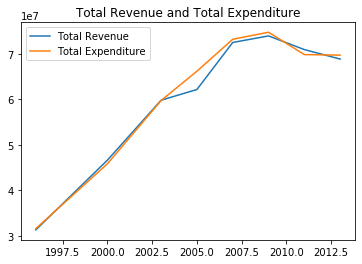

In [10]:
plt.plot(df.loc[df.STATE == 'CALIFORNIA','YEAR'], df.loc[df.STATE == 'CALIFORNIA','TOTAL_REVENUE'], label= 'Total Revenue')
plt.plot(df.loc[df.STATE == 'CALIFORNIA','YEAR'], df.loc[df.STATE == 'CALIFORNIA','TOTAL_EXPENDITURE'], label= 'Total Expenditure')
plt.title("Total Revenue and Total Expenditure")
plt.legend()
plt.show()

As you can see both plots almost have similar patern but in some point like 2003 to 2007 the Total Revenue is less than Total Expenditure.
Also, after 2013 both plots increasing and in 2017 which is peak time for both plots, Total Revenue is greater than Total Expenditure.

3.In your chosen state, which of the lessons are the students more successful, math or reading?

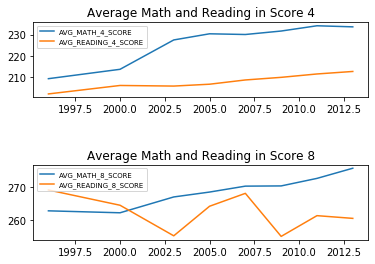

In [11]:
plt.subplot(2, 1, 1)
plt.plot(df.loc[df.STATE=='CALIFORNIA', 'YEAR'], df.loc[df.STATE=='CALIFORNIA','AVG_MATH_4_SCORE'], label='AVG_MATH_4_SCORE')
plt.plot(df.loc[df.STATE=='CALIFORNIA', 'YEAR'], df.loc[df.STATE=='CALIFORNIA','AVG_READING_4_SCORE'], label= 'AVG_READING_4_SCORE')
plt.legend(loc='upper left', fontsize=7)
plt.title("Average Math and Reading in Score 4")

plt.subplot(2, 1, 2)         
plt.plot(df.loc[df.STATE=='CALIFORNIA', 'YEAR'], df.loc[df.STATE=='CALIFORNIA','AVG_MATH_8_SCORE'], label='AVG_MATH_8_SCORE')       
plt.plot(df.loc[df.STATE=='CALIFORNIA', 'YEAR'], df.loc[df.STATE=='CALIFORNIA','AVG_READING_8_SCORE'], label='AVG_READING_8_SCORE')
plt.title("Average Math and Reading in Score 8")
plt.legend(loc='upper left', fontsize=7)
plt.subplots_adjust(hspace=0.9)
plt.show()

As shown,In California, students are more successful at math than reading.

4.What are the distributions of the math and reading scores in the sample?

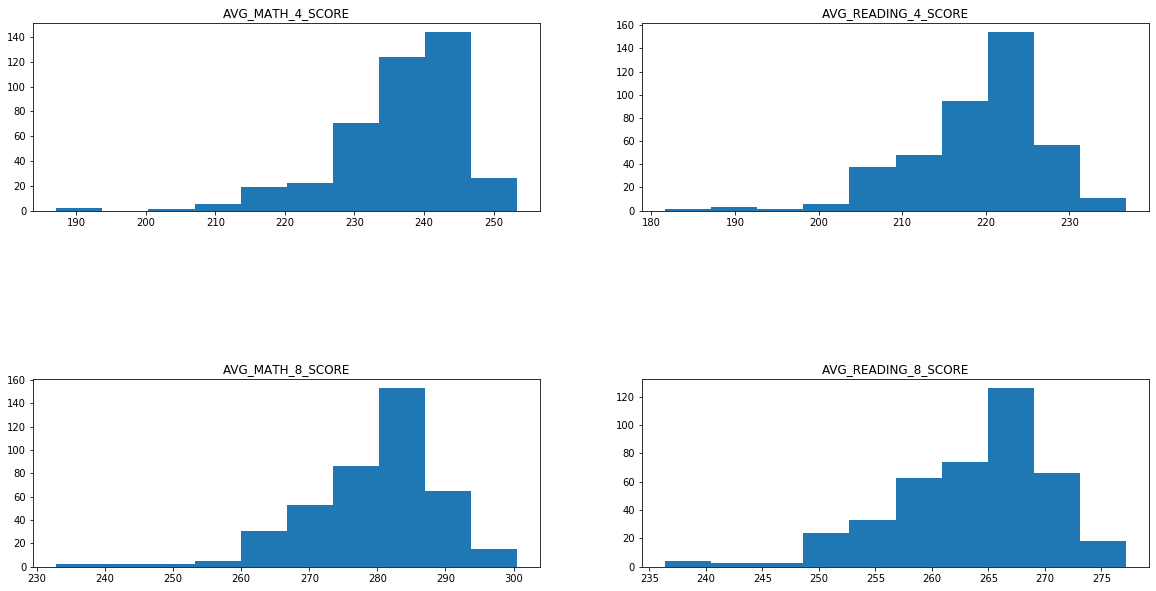

In [12]:
plt.figure(figsize=(20,10))

plt.subplot(2, 2, 1)
plt.hist(df['AVG_MATH_4_SCORE'])
plt.title('AVG_MATH_4_SCORE')

plt.subplot(2, 2, 2)
plt.hist(df['AVG_READING_4_SCORE'])
plt.title('AVG_READING_4_SCORE')

plt.subplot(2, 2, 3)
plt.hist(df['AVG_MATH_8_SCORE'])
plt.title('AVG_MATH_8_SCORE')

plt.subplot(2, 2, 4)
plt.hist(df['AVG_READING_8_SCORE'])
plt.title('AVG_READING_8_SCORE')

plt.subplots_adjust(hspace = 0.9)
plt.show()

As you can see , Math plots have wider distribution than Reading. Also, plots are not normal distribution and skewed to the left or nagative skewed which means average of scores are less than median.

5.Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables.

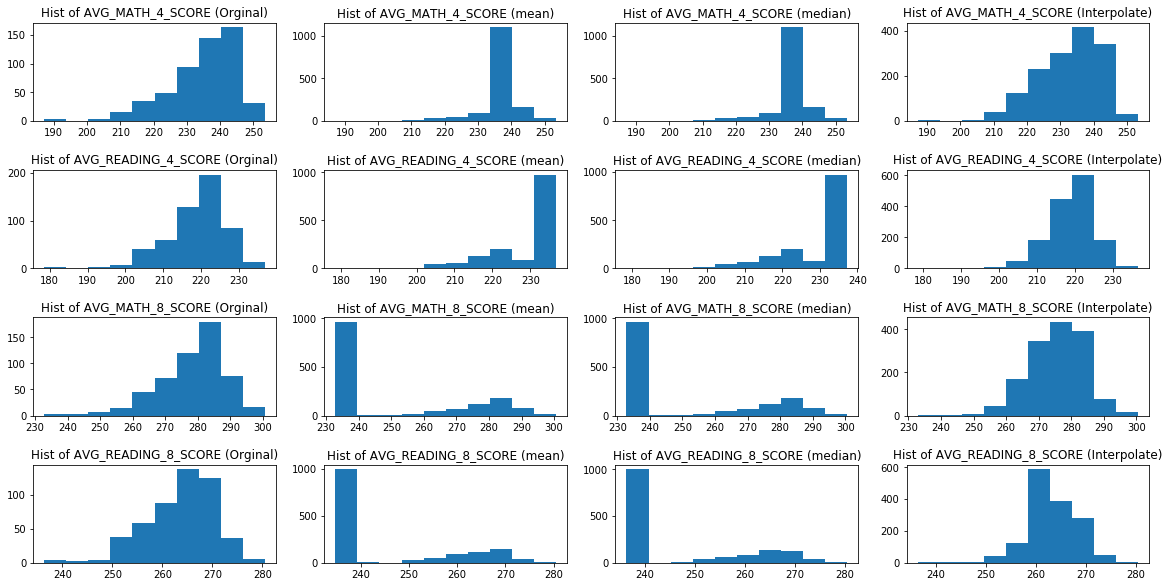

In [13]:
plt.figure(figsize=(20,20))

plt.subplot(4, 4, 1)
plt.hist(df1.AVG_MATH_4_SCORE.dropna())
plt.title('Hist of AVG_MATH_4_SCORE (Orginal)')

plt.subplot(4, 4, 2)
plt.hist(df1.AVG_MATH_4_SCORE.fillna(df1.AVG_MATH_4_SCORE.mean()))
plt.title('Hist of AVG_MATH_4_SCORE (mean)')

plt.subplot(4, 4, 3)
plt.hist(df1.AVG_MATH_4_SCORE.fillna(df1.AVG_MATH_4_SCORE.median()))
plt.title('Hist of AVG_MATH_4_SCORE (median)')
          
plt.subplot(4, 4, 4)
plt.hist(df1.AVG_MATH_4_SCORE.interpolate(method='linear'))
plt.title('Hist of AVG_MATH_4_SCORE (Interpolate)')

plt.subplot(4, 4, 5)
plt.hist(df1.AVG_READING_4_SCORE.dropna())
plt.title('Hist of AVG_READING_4_SCORE (Orginal)')

plt.subplot(4, 4, 6)
plt.hist(df1.AVG_READING_4_SCORE.fillna(df1.AVG_MATH_4_SCORE.mean()))
plt.title('Hist of AVG_READING_4_SCORE (mean)')

plt.subplot(4, 4, 7)          
plt.hist(df1.AVG_READING_4_SCORE.fillna(df1.AVG_MATH_4_SCORE.median()))
plt.title('Hist of AVG_READING_4_SCORE (median)')
          
plt.subplot(4, 4, 8)    
plt.hist(df1.AVG_READING_4_SCORE.interpolate(method='linear'))
plt.title('Hist of AVG_READING_4_SCORE (Interpolate)')

plt.subplot(4, 4, 9)
plt.hist(df1.AVG_MATH_8_SCORE.dropna())
plt.title('Hist of AVG_MATH_8_SCORE (Orginal)')

plt.subplot(4, 4, 10)
plt.hist(df1.AVG_MATH_8_SCORE.fillna(df1.AVG_MATH_4_SCORE.mean()))
plt.title('Hist of AVG_MATH_8_SCORE (mean)')
          
plt.subplot(4, 4, 11)    
plt.hist(df1.AVG_MATH_8_SCORE.fillna(df1.AVG_MATH_4_SCORE.median()))
plt.title('Hist of AVG_MATH_8_SCORE (median)')
          
plt.subplot(4, 4, 12)
plt.hist(df1.AVG_MATH_8_SCORE.interpolate(method='linear'))
plt.title('Hist of AVG_MATH_8_SCORE (Interpolate)')

plt.subplot(4, 4, 13)
plt.hist(df1.AVG_READING_8_SCORE.dropna())
plt.title('Hist of AVG_READING_8_SCORE (Orginal)')

plt.subplot(4, 4, 14)
plt.hist(df1.AVG_READING_8_SCORE.fillna(df1.AVG_MATH_4_SCORE.mean()))
plt.title('Hist of AVG_READING_8_SCORE (mean)')
          
plt.subplot(4, 4, 15)
plt.hist(df1.AVG_READING_8_SCORE.fillna(df1.AVG_MATH_4_SCORE.median()))
plt.title('Hist of AVG_READING_8_SCORE (median)')
          
plt.subplot(4, 4, 16)
plt.hist(df1.AVG_READING_8_SCORE.interpolate(method='linear'))
plt.title('Hist of AVG_READING_8_SCORE (Interpolate)')

plt.subplots_adjust(hspace=0.5, top=0.5)
plt.show()

As you can see, filling missing value with mean and median have more affect on the distribution, because we have lot's of missing values. So,it is better to use interpolate or drop null values to get bettr result which means more like normal distribution.